# Hypothesis 1: Main Effect
## SDT Predicts AI Acceptance

**Hypothesis**: Participants with higher levels of self-determination (TENS_Life) will report significantly higher acceptance of AI-based mental health interventions (UTAUT_AI).

**Operationalization**: 
- Predictor: TENS_Life_mean (Self-Determination Theory: Autonomy, Competence, Relatedness)
- Outcome: UTAUT_AI_mean (AI Acceptance)
- Controls: age, gender, SSRPH_mean (stigma), PHQ5_mean (depression)
- Statistical Test: Multiple regression


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

# Import data utilities
from data_processing import load_and_prepare_data

# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

print("Libraries imported successfully!")


Libraries imported successfully!


## 1. Load Data


In [2]:
# Load prepared data
combined_data = pd.read_csv('data/processed/combined_data.csv')

print(f"\nDataset shape: {combined_data.shape}")
print(f"Variables: {list(combined_data.columns)}")



Dataset shape: (2096, 13)
Variables: ['TENS_Life_mean', 'UTAUT_AI_mean', 'GAAIS_mean', 'ET_mean', 'SSRPH_mean', 'PHQ5_mean', 'would_you_use_mean', 'age', 'gender', 'role', 'country', 'ID', 'country_code']


## 2. Prepare Data for Analysis


In [3]:
# Prepare data for H1 analysis
h1_data = combined_data[['TENS_Life_mean', 'UTAUT_AI_mean', 'age', 'gender', 
                          'country_code', 'SSRPH_mean', 'PHQ5_mean']].dropna()

# Convert gender to numeric if needed
if h1_data['gender'].dtype == 'object':
    h1_data['gender'] = pd.Categorical(h1_data['gender']).codes

print(f"Sample size for H1 analysis: {len(h1_data)}")
print(f"\nDescriptive statistics:")
print(h1_data[['TENS_Life_mean', 'UTAUT_AI_mean']].describe())


Sample size for H1 analysis: 2085

Descriptive statistics:
       TENS_Life_mean  UTAUT_AI_mean
count     2085.000000    2085.000000
mean         4.768492       4.074045
std          1.020626       0.501159
min          1.000000       1.846154
25%          4.000000       3.756757
50%          4.875000       4.115385
75%          5.500000       4.423077
max          7.000000       5.846154


## 3. Simple Correlation Analysis


H1 - Simple Correlation Analysis:
  Pearson r = 0.039
  p-value = 0.0748
  ✗ Not significant at α = 0.05


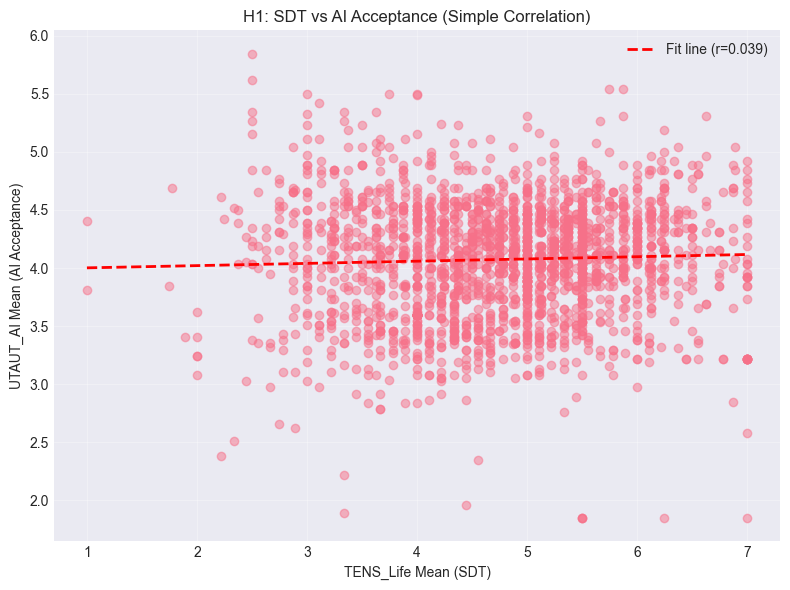

In [4]:
# Model 1: Simple correlation
correlation, p_value = stats.pearsonr(h1_data['TENS_Life_mean'], h1_data['UTAUT_AI_mean'])

print("H1 - Simple Correlation Analysis:")
print(f"  Pearson r = {correlation:.3f}")
print(f"  p-value = {p_value:.4f}")
print(f"  {'✓ Significant' if p_value < 0.05 else '✗ Not significant'} at α = 0.05")

# Visualize correlation
plt.figure(figsize=(8, 6))
plt.scatter(h1_data['TENS_Life_mean'], h1_data['UTAUT_AI_mean'], alpha=0.5)
z = np.polyfit(h1_data['TENS_Life_mean'], h1_data['UTAUT_AI_mean'], 1)
p = np.poly1d(z)
plt.plot(h1_data['TENS_Life_mean'].sort_values(), 
         p(h1_data['TENS_Life_mean'].sort_values()), "r--", linewidth=2, label=f'Fit line (r={correlation:.3f})')
plt.xlabel('TENS_Life Mean (SDT)')
plt.ylabel('UTAUT_AI Mean (AI Acceptance)')
plt.title('H1: SDT vs AI Acceptance (Simple Correlation)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


## 4. Multiple Regression Analysis (with Controls)


In [5]:
# Model 2: Multiple regression with controls
X = h1_data[['TENS_Life_mean', 'age', 'gender', 'SSRPH_mean', 'PHQ5_mean']]
X = sm.add_constant(X)
y = h1_data['UTAUT_AI_mean']

model_h1 = sm.OLS(y, X).fit()
print("H1 - Multiple Regression (controlling for age, gender, stigma, depression):")
print(model_h1.summary())

# Extract key statistics
tens_coef = model_h1.params['TENS_Life_mean']
tens_std = model_h1.bse['TENS_Life_mean']
tens_p = model_h1.pvalues['TENS_Life_mean']
tens_ci_lower = model_h1.conf_int().loc['TENS_Life_mean', 0]
tens_ci_upper = model_h1.conf_int().loc['TENS_Life_mean', 1]

print(f"\n{'='*60}")
print(f"KEY RESULT:")
print(f"{'='*60}")
print(f"  TENS_Life_mean coefficient: β = {tens_coef:.3f}")
print(f"  Standard Error: SE = {tens_std:.3f}")
print(f"  95% CI: [{tens_ci_lower:.3f}, {tens_ci_upper:.3f}]")
print(f"  p-value = {tens_p:.4f}")
print(f"  R² = {model_h1.rsquared:.3f}")
print(f"  Adjusted R² = {model_h1.rsquared_adj:.3f}")
print(f"\n  {'✓ H1 SUPPORTED' if tens_p < 0.05 and tens_coef > 0 else '✗ H1 NOT SUPPORTED'}")
print(f"{'='*60}")


H1 - Multiple Regression (controlling for age, gender, stigma, depression):
                            OLS Regression Results                            
Dep. Variable:          UTAUT_AI_mean   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.200
Method:                 Least Squares   F-statistic:                     105.5
Date:                Wed, 05 Nov 2025   Prob (F-statistic):           1.95e-99
Time:                        23:12:10   Log-Likelihood:                -1281.9
No. Observations:                2085   AIC:                             2576.
Df Residuals:                    2079   BIC:                             2610.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

## 5. Visualization of Results


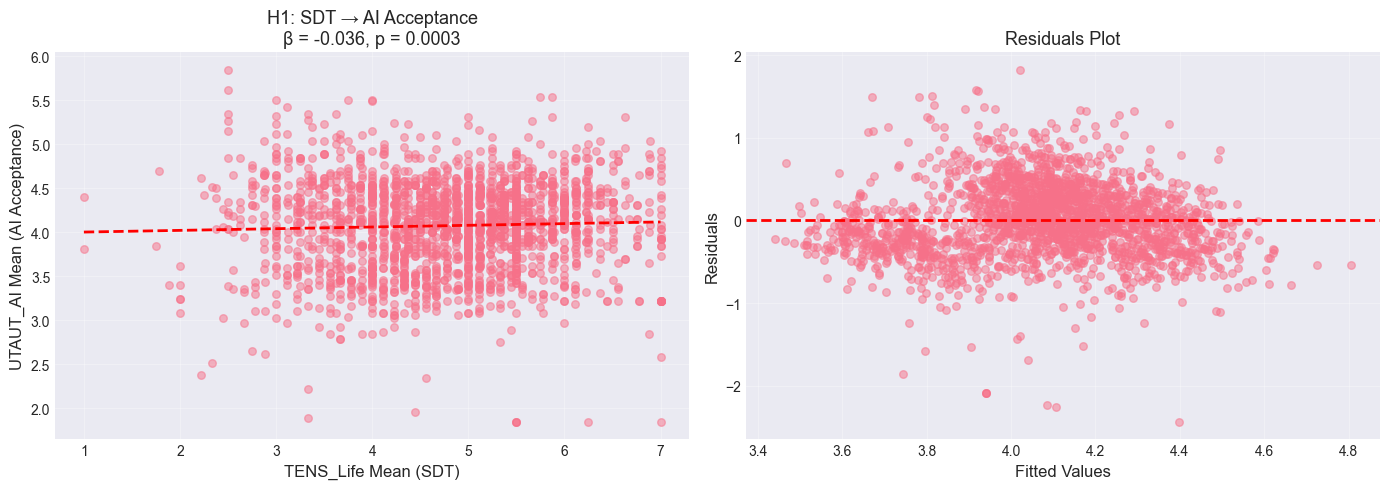

In [6]:
# Create visualization of regression results
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 1. Scatter plot with regression line
axes[0].scatter(h1_data['TENS_Life_mean'], h1_data['UTAUT_AI_mean'], alpha=0.5, s=30)
z = np.polyfit(h1_data['TENS_Life_mean'], h1_data['UTAUT_AI_mean'], 1)
p = np.poly1d(z)
axes[0].plot(h1_data['TENS_Life_mean'].sort_values(), 
             p(h1_data['TENS_Life_mean'].sort_values()), "r--", linewidth=2)
axes[0].set_xlabel('TENS_Life Mean (SDT)', fontsize=12)
axes[0].set_ylabel('UTAUT_AI Mean (AI Acceptance)', fontsize=12)
axes[0].set_title(f'H1: SDT → AI Acceptance\nβ = {tens_coef:.3f}, p = {tens_p:.4f}', fontsize=13)
axes[0].grid(True, alpha=0.3)

# 2. Residuals plot
residuals = model_h1.resid
fitted = model_h1.fittedvalues
axes[1].scatter(fitted, residuals, alpha=0.5, s=30)
axes[1].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[1].set_xlabel('Fitted Values', fontsize=12)
axes[1].set_ylabel('Residuals', fontsize=12)
axes[1].set_title('Residuals Plot', fontsize=13)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## 6. Summary

**Hypothesis 1 Results:**
- **Main Effect**: TENS_Life_mean → UTAUT_AI_mean
- **Coefficient**: β = {tens_coef:.3f}
- **p-value**: {tens_p:.4f}
- **Conclusion**: {'SUPPORTED' if tens_p < 0.05 and tens_coef > 0 else 'NOT SUPPORTED'}
